<a href="https://colab.research.google.com/github/galua2001/colab/blob/main/%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%954_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
yt = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
print(perch_length.shape)
print(yt.shape)

(56,)
(56,)


In [ ]:
perch_length=perch_length.reshape(-1,1)


print(perch_length)
x=np.insert(perch_length, 0, 1.0, axis=1)
print(x)

[[ 8.4]
 [13.7]
 [15. ]
 [16.2]
 [17.4]
 [18. ]
 [18.7]
 [19. ]
 [19.6]
 [20. ]
 [21. ]
 [21. ]
 [21. ]
 [21.3]
 [22. ]
 [22. ]
 [22. ]
 [22. ]
 [22. ]
 [22.5]
 [22.5]
 [22.7]
 [23. ]
 [23.5]
 [24. ]
 [24. ]
 [24.6]
 [25. ]
 [25.6]
 [26.5]
 [27.3]
 [27.5]
 [27.5]
 [27.5]
 [28. ]
 [28.7]
 [30. ]
 [32.8]
 [34.5]
 [35. ]
 [36.5]
 [36. ]
 [37. ]
 [37. ]
 [39. ]
 [39. ]
 [39. ]
 [40. ]
 [40. ]
 [40. ]
 [40. ]
 [42. ]
 [43. ]
 [43. ]
 [43.5]
 [44. ]]
[[ 1.   8.4]
 [ 1.  13.7]
 [ 1.  15. ]
 [ 1.  16.2]
 [ 1.  17.4]
 [ 1.  18. ]
 [ 1.  18.7]
 [ 1.  19. ]
 [ 1.  19.6]
 [ 1.  20. ]
 [ 1.  21. ]
 [ 1.  21. ]
 [ 1.  21. ]
 [ 1.  21.3]
 [ 1.  22. ]
 [ 1.  22. ]
 [ 1.  22. ]
 [ 1.  22. ]
 [ 1.  22. ]
 [ 1.  22.5]
 [ 1.  22.5]
 [ 1.  22.7]
 [ 1.  23. ]
 [ 1.  23.5]
 [ 1.  24. ]
 [ 1.  24. ]
 [ 1.  24.6]
 [ 1.  25. ]
 [ 1.  25.6]
 [ 1.  26.5]
 [ 1.  27.3]
 [ 1.  27.5]
 [ 1.  27.5]
 [ 1.  27.5]
 [ 1.  28. ]
 [ 1.  28.7]
 [ 1.  30. ]
 [ 1.  32.8]
 [ 1.  34.5]
 [ 1.  35. ]
 [ 1.  36.5]
 [ 1.  36. ]
 [ 1.

(56, 2)


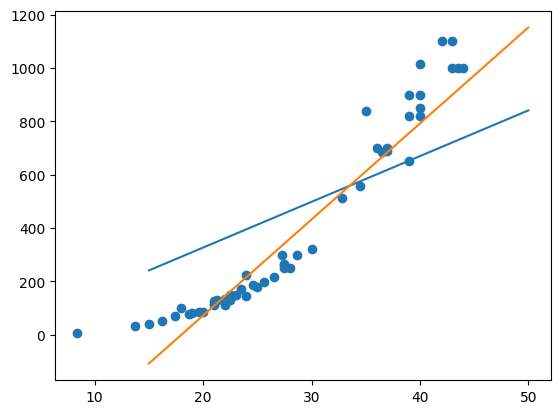

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x[:,1], yt)
print(x.shape)
plt.plot([15,50],[15*16.+1, 50*16.8+1])
plt.plot([15,50],[15*36-648, 50*36-648])

In [ ]:
def pred(x, w):
    return(x @ w)

In [ ]:
print(x.shape)

(56, 2)


In [ ]:
# 초기화 처리

# 데이터 전체 건수
M = x.shape[0]

# 입력 데이터의 차수 (더미 변수 포함)
D = x.shape[1]

# 반복 횟수
iters = 100

# 학습률
alpha = 0.001

# 가중치 벡터의 초깃값 (모든 값을 1로 한다)
w = np.ones(D)

# 평가 결과 기록 (손실함수의 값만 기록)
history = np.zeros((0,2))

In [ ]:
# 반복 루프
for k in range(iters):

    # 예측값 계산 (7.8.1)
    yp = pred(x, w)

    # 오차 계산 (7.8.2)
    yd = yp - yt

    # 경사하강법 적용 (7.8.4)
    w = w - alpha * (x.T.dot( yd)) / M

    # 학습 곡선을 그리기 위한 데이터 계산 및 저장
    if k % 10 == 0 :
        # 손실함숫값의 계산 (7.6.1)
        loss = np.mean(yd ** 2) / 2
        # 계산 결과의 기록
        history = np.vstack(( history, np.array([k, loss])))
        # 화면 표시
        print("iter=%d loss=%f" %(k, loss))




iter=0 loss=118854.198750
iter=10 loss=24424.729288
iter=20 loss=24388.240398
iter=30 loss=24351.819371
iter=40 loss=24315.466082
iter=50 loss=24279.180403
iter=60 loss=24242.962210
iter=70 loss=24206.811376
iter=80 loss=24170.727777
iter=90 loss=24134.711288


In [ ]:
print(history.shape)

(10, 2)


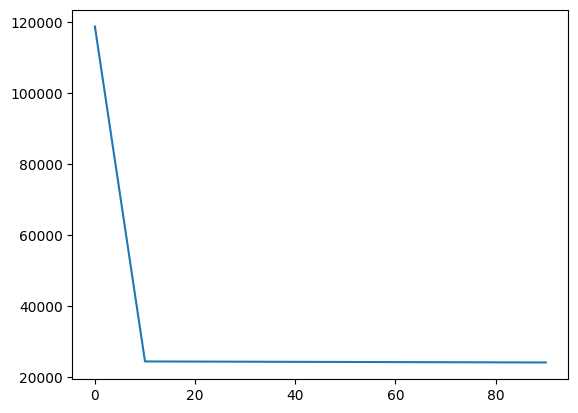

In [ ]:
plt.plot(history[:,0], history[:,1])
plt.show()

In [ ]:
print(yd, loss)


[ 124.12385478  182.88700183  195.70249073  203.41678818  204.13108562
  183.73823435  216.94657452  219.75014888  224.35729761  230.76206342
  221.77397796  216.77397796  206.77397796  206.57755232  227.7858925
  227.7858925   217.7858925   212.7858925   237.7858925   225.79184977
  205.79184977  213.99423267  213.79780704  201.8037643   154.80972157
  234.80972157  201.4168703   215.82163611  208.42878483  201.83950792
  132.64903955  175.85142246  170.85142246  185.85142246  193.85737972
  155.0657199   155.8812088     6.71456951   -8.06517578 -284.05921851
 -105.0413467  -128.04730397 -112.03538943 -102.03538943 -280.01156036
  -30.01156036 -200.01156036 -213.99964582 -263.99964582 -378.99964582
 -183.99964582 -431.97581675 -315.96390221 -415.96390221 -307.95794494
 -299.95198767] 24134.71128763956


In [ ]:
print(yd.shape)

(56,)


In [ ]:
print(w)

[-4.53612987 16.01386225]


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(perch_length, yt)
print(lr.coef_, lr.intercept_)

[36.93837597] -648.0775582457385
